# Import necessary libraries

In [17]:
import pandas as pd
!pip install gensim scikit-learn
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import database

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
data = breast_cancer.data.features
data['class'] = breast_cancer.data.targets  # Add the target column as 'class'

In [19]:
# Convert all columns to string data type to prevent date interpretation
data = data.astype(str)  # Convierte todas las columnas a texto

In [20]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n" + "-"*40 + "\n")

Unique values in 'age':
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

----------------------------------------

Unique values in 'menopause':
['premeno' 'ge40' 'lt40']

----------------------------------------

Unique values in 'tumor-size':
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']

----------------------------------------

Unique values in 'inv-nodes':
['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']

----------------------------------------

Unique values in 'node-caps':
['no' 'yes' 'nan']

----------------------------------------

Unique values in 'deg-malig':
['3' '2' '1']

----------------------------------------

Unique values in 'breast':
['left' 'right']

----------------------------------------

Unique values in 'breast-quad':
['left_low' 'right_up' 'left_up' 'right_low' 'central' 'nan']

----------------------------------------

Unique values in 'irradiat':
['no' 'yes']

----------------------------------------

U

It was identified that 'tumor-size' contains misencoded values: '14-Oct' and '9-May'.
The variable 'inv-nodes' also has misencoded values such as '8-Jun', "11-Sep, '5-Mar', and '14-Dec'.
Therefore, these values will be modified.

In [21]:
# Correct misencoded values in 'tumor-size'
data['tumor-size'] = data['tumor-size'].replace({
    '14-Oct': '10-14',
    '9-May': '5-9'
})

# Correct misencoded values in 'inv-nodes'
data['inv-nodes'] = data['inv-nodes'].replace({
    '8-Jun': '6-8',
    '5-Mar': '3-5',
    '11-Sep': '9-11',
    '14-Dec': '12-14'
})

# Display unique values in 'tumor-size' and 'inv-nodes' to verify the corrections
print("Unique values in 'tumor-size':")
print(data['tumor-size'].unique())
print("\nUnique values in 'inv-nodes':")
print(data['inv-nodes'].unique())


Unique values in 'tumor-size':
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

Unique values in 'inv-nodes':
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']


# Libraries outside the course

## Altair

In [26]:
# Import Altair library
!pip install altair
import altair as alt  

# Ensure the 'age' column is of type string
# Altair requires categorical data to be treated as strings for proper visualization
if not data['age'].dtype == 'object':
    data['age'] = data['age'].astype(str)

# Create a bar chart for the 'age' variable
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('age:N', title='Age'),  
    y=alt.Y('count()', title='Number of Cases'), 
    color='class:N', 
    tooltip=['age', 'count()']  
).properties(
    title='Distribution of Age', 
    width=600,  # Set the width of the chart
    height=400  # Set the height of the chart
)

# Display the chart
chart.show() 



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


alt.Chart(...)

## sklearn


Contingency Table (Age vs Tumor-Size):
tumor-size-category  0-10  10-20  20-30  30-40  40-50  50+
age                                                       
25                      0      0      0      1      0    0
35                      3      7     12     10      4    0
45                      3     13     39     27      6    2
55                      4     19     35     27      8    3
65                      1     17     17     14      5    3
75                      1      2      1      0      2    0

Mean Squared Error: 107.25591584093414
R-squared (R²): -0.013152406848444986

Model Coefficients: [0.03323587]
Intercept: 24.736025715487372


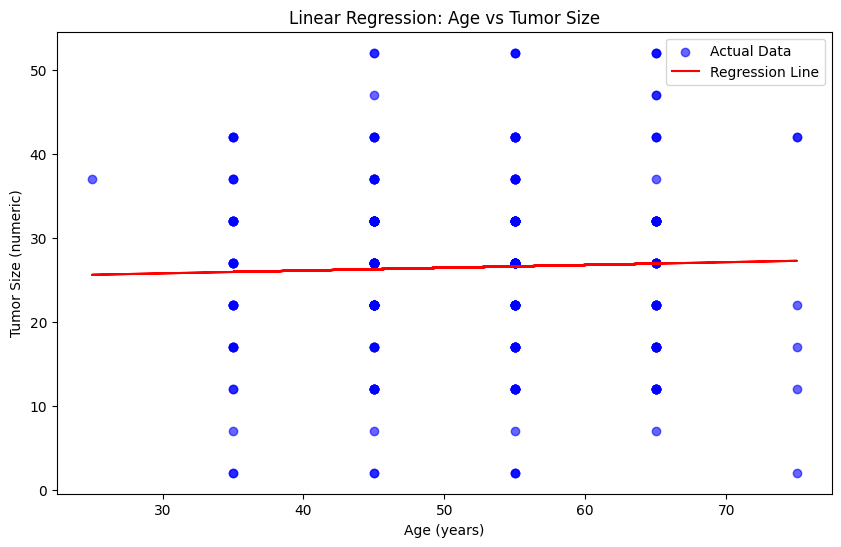

In [33]:
# Create a copy of the original data
data_sklearn = data.copy()

# Convert 'age' to a numeric representation for the regression
# Define a mapping for age ranges to their approximate midpoints
age_mapping = {
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75
}

# Apply the mapping to 'age' in the copied dataset
data_sklearn['age'] = data_sklearn['age'].replace(age_mapping)

# Preprocess 'tumor-size' to convert textual ranges into numeric midpoints
tumor_size_mapping = {
    '0-4': 2,
    '5-9': 7,
    '10-14': 12,
    '15-19': 17,
    '20-24': 22,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52
}
data_sklearn['tumor-size'] = data_sklearn['tumor-size'].replace(tumor_size_mapping)

# Ensure no missing values in the variables of interest
data_sklearn = data_sklearn.dropna(subset=['age', 'tumor-size'])

# Contingency table
data_sklearn['tumor-size-category'] = pd.cut(
    data_sklearn['tumor-size'], 
    bins=[0, 10, 20, 30, 40, 50, 60],
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
)
contingency_table = pd.crosstab(data_sklearn['age'], data_sklearn['tumor-size-category'])
print("\nContingency Table (Age vs Tumor-Size):")
print(contingency_table)

# Import libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = data_sklearn[['age']]  # Predictor: age
y = data_sklearn['tumor-size']  # Outcome: tumor-size

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))

# Display the coefficients of the model
print("\nModel Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

# Plot the regression line with the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Tumor Size (numeric)')
plt.title('Linear Regression: Age vs Tumor Size')
plt.legend()
plt.show()


In [2]:
pip install gensim scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
